## Semi Structured Data Project

Group : Alex Bernal & Babak Maleki

*Project Goals

- Write a program that will read in JSON Formatted data from a file 
- Perform Data Analysis Summaries of import Data
- Answer Question : What is the sentiment of the most recent Donald Trump Tweets?

Data Source twitter.com


In [128]:
#Import Libraries
import tweepy 
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import json
import pandas as pd
import numpy as np
import re    # for regular expressions
import nltk  # for text manipulation
import string
import warnings


# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [129]:
#Extract Twitter Data
#Use your keys
# Consume:
CONSUMER_KEY    = 'Z7swXxO5KISDASwxiJmoHXQnX'
CONSUMER_SECRET = 'VDBJKxoY3MCb7s5YbIl5lTk4HSgayQYIbVxRQ81iGtgD6MdyZq'

# Access:
ACCESS_TOKEN  = '418036639-PTleI12U9lBDsPDCdiJFjSYqhBkyskGjEScalAzA'
ACCESS_SECRET = 'DAkPHeIJbZ2vyNzGxY9JnoVPhcXoOjOw0o0pO7mItM6vP'

# We import our access keys:
from credentials import *    # This will allow us to use the keys as variables

# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="realDonaldTrump", count=2000)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets:

RT @seanhannity: Adam Schiff, Glenn Simpson and their Forrest Gump-like encounter in Aspen https://t.co/j2lqrxflGH

RT @seanhannity: https://t.co/rhKgdlJt8X

RT @seanhannity: TRUMP: “Not only did Senator Burr’s Committee find No Collusion by the Trump Campaign and Russia, it’s important because t…

We have a great economy DESPITE the Obama Administration and all of its job killing Regulations and Roadblocks. If… https://t.co/2rueUOdvof

The Democrats in Congress yesterday were vicious and totally showed their cards for everyone to see. When the Repub… https://t.co/jji6able2y



## Pandas To JSON to Pandas

In [130]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(3))

,Tweets
0,"RT @seanhannity: Adam Schiff, Glenn Simpson and their Forrest Gump-like encounter in Aspen https://t.co/j2lqrxflGH"
1,RT @seanhannity: https://t.co/rhKgdlJt8X
2,"RT @seanhannity: TRUMP: “Not only did Senator Burr’s Committee find No Collusion by the Trump Campaign and Russia, it’s important because t…"


In [131]:
# Create and Organzize Features only Relavant Factors to analyze Tweets
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])
# Display of first 10 elements from dataframe:
display(data.head(3))

,Tweets,len,ID,Date,Source,Likes,RTs
0,"RT @seanhannity: Adam Schiff, Glenn Simpson and their Forrest Gump-like encounter in Aspen https://t.co/j2lqrxflGH",114,1094249047907581952,2019-02-09 14:57:57,Twitter for iPhone,0,7377
1,RT @seanhannity: https://t.co/rhKgdlJt8X,40,1094248839198969857,2019-02-09 14:57:08,Twitter for iPhone,0,5221
2,"RT @seanhannity: TRUMP: “Not only did Senator Burr’s Committee find No Collusion by the Trump Campaign and Russia, it’s important because t…",140,1094247546829058048,2019-02-09 14:51:59,Twitter for iPhone,0,9217


In [132]:
#Export Dataframe to JSON
Export = data.to_json(r'C:\\Users\\User\\Desktop\\Export_Tweets.json')

In [133]:
import pandas as pd
_json_file = 'C:\\Users\\User\\Desktop\\Export_Tweets.json'
pd_json = pd.read_json(_json_file, convert_dates=True)
pd_json.head(3)

,Tweets,len,ID,Date,Source,Likes,RTs
0,"RT @seanhannity: Adam Schiff, Glenn Simpson and their Forrest Gump-like encounter in Aspen https://t.co/j2lqrxflGH",114,1094249047907581952,2019-02-09 14:57:57,Twitter for iPhone,0,7377
1,RT @seanhannity: https://t.co/rhKgdlJt8X,40,1094248839198969857,2019-02-09 14:57:08,Twitter for iPhone,0,5221
10,"Working hard, thank you! https://t.co/tnuHnw8kll",48,1093965250142056448,2019-02-08 20:10:15,Twitter for iPhone,94731,20516


## Data Exploration

In [134]:
#Look at Data Elements from single tweet
# We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1094249047907581952
2019-02-09 14:57:57
Twitter for iPhone
0
7377
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'seanhannity', 'name': 'Sean Hannity', 'id': 41634520, 'id_str': '41634520', 'indices': [3, 15]}], 'urls': [{'url': 'https://t.co/j2lqrxflGH', 'expanded_url': 'https://thehill.com/hilltv/rising/429041-adam-schiff-glenn-simpson-and-their-forrest-gump-like-encounter-in-aspen', 'display_url': 'thehill.com/hilltv/rising/…', 'indices': [91, 114]}]}


In [135]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
##Average Tweet Length
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The length's average in tweets: {}".format(mean))

The length's average in tweets: 123.005


Text(0,0.5,'_')

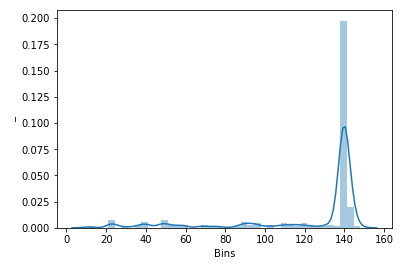

In [136]:
sns.distplot(data['len']);
plt.xlabel("Bins")
plt.ylabel("_")

In [137]:
data['word_count'] = data['Tweets'].apply(lambda x: len(str(x).split(" ")))
data[['Tweets','word_count']].head()

,Tweets,word_count
0,"RT @seanhannity: Adam Schiff, Glenn Simpson and their Forrest Gump-like encounter in Aspen https://t.co/j2lqrxflGH",14
1,RT @seanhannity: https://t.co/rhKgdlJt8X,3
2,"RT @seanhannity: TRUMP: “Not only did Senator Burr’s Committee find No Collusion by the Trump Campaign and Russia, it’s important because t…",22
3,We have a great economy DESPITE the Obama Administration and all of its job killing Regulations and Roadblocks. If… https://t.co/2rueUOdvof,20
4,The Democrats in Congress yesterday were vicious and totally showed their cards for everyone to see. When the Repub… https://t.co/jji6able2y,20


Text(27.125,0.5,'Tweet Word Count')

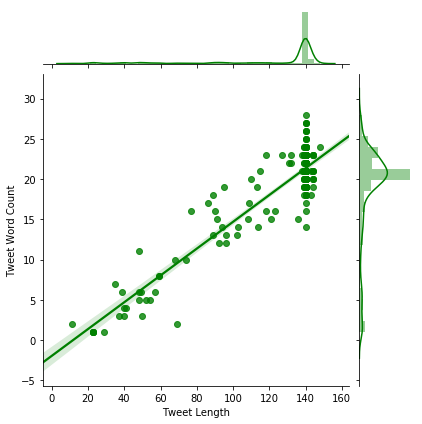

In [138]:
sns.jointplot(data=data, x='len', y='word_count', kind='reg', color='g')
plt.xlabel("Tweet Length")
plt.ylabel("Tweet Word Count")

In [139]:
# Number of Characters
data['char_count'] = data['Tweets'].str.len() ## this also includes spaces
mean2 = np.mean(data['char_count'])

print("The length's average in Characters: {}".format(mean2))

The length's average in Characters: 123.005


In [140]:
data.head(3)

,Tweets,len,ID,Date,Source,Likes,RTs,word_count,char_count
0,"RT @seanhannity: Adam Schiff, Glenn Simpson and their Forrest Gump-like encounter in Aspen https://t.co/j2lqrxflGH",114,1094249047907581952,2019-02-09 14:57:57,Twitter for iPhone,0,7377,14,114
1,RT @seanhannity: https://t.co/rhKgdlJt8X,40,1094248839198969857,2019-02-09 14:57:08,Twitter for iPhone,0,5221,3,40
2,"RT @seanhannity: TRUMP: “Not only did Senator Burr’s Committee find No Collusion by the Trump Campaign and Russia, it’s important because t…",140,1094247546829058048,2019-02-09 14:51:59,Twitter for iPhone,0,9217,22,140


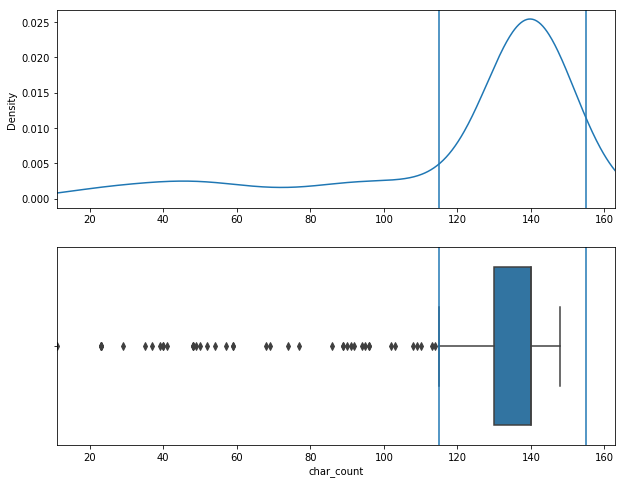

In [141]:
#Box Plots
q75, q25 = np.percentile(data.char_count, [75 ,25])
iqr = q75 - q25
 
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)

i = data['char_count']
 
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(data['char_count'].min(), data['char_count'].max()*1.1)
plt.axvline(x=min)
plt.axvline(x=max)
 
ax = data['char_count'].plot(kind='kde')
 
plt.subplot(212)
plt.xlim(data['char_count'].min(), data['char_count'].max()*1.1)
sns.boxplot(x=data['char_count'])
plt.axvline(x=min)
plt.axvline(x=max)

In [142]:
# Average Word Length
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

data['avg_word'] = data['Tweets'].apply(lambda x: avg_word(x))
data[['Tweets','char_count','word_count','avg_word']].head(3)

,Tweets,char_count,word_count,avg_word
0,"RT @seanhannity: Adam Schiff, Glenn Simpson and their Forrest Gump-like encounter in Aspen https://t.co/j2lqrxflGH",114,14,7.214286
1,RT @seanhannity: https://t.co/rhKgdlJt8X,40,3,12.666667
2,"RT @seanhannity: TRUMP: “Not only did Senator Burr’s Committee find No Collusion by the Trump Campaign and Russia, it’s important because t…",140,22,5.409091


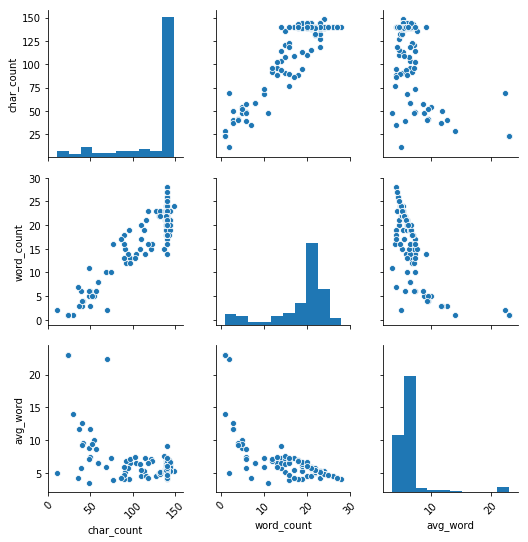

In [143]:
g = sns.pairplot(data[['char_count','word_count','avg_word']], diag_kind="hist")
 
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)

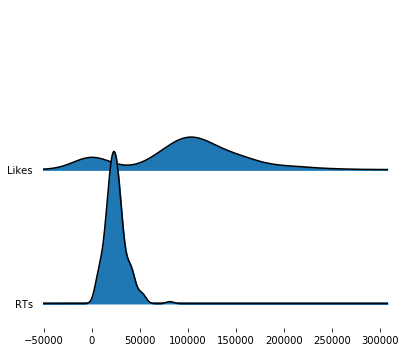

In [144]:
import joypy
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
df = data[['Likes','RTs']]
df.head()
fig, axes = joypy.joyplot(df, figsize=(6,5))

In [153]:
unclean = data
unclean.head(3)

,Tweets,len,ID,Date,Source,Likes,RTs,word_count,char_count,avg_word
0,"RT @seanhannity: Adam Schiff, Glenn Simpson and their Forrest Gump-like encounter in Aspen https://t.co/j2lqrxflGH",114,1094249047907581952,2019-02-09 14:57:57,Twitter for iPhone,0,7377,14,114,7.214286
1,RT @seanhannity: https://t.co/rhKgdlJt8X,40,1094248839198969857,2019-02-09 14:57:08,Twitter for iPhone,0,5221,3,40,12.666667
2,"RT @seanhannity: TRUMP: “Not only did Senator Burr’s Committee find No Collusion by the Trump Campaign and Russia, it’s important because t…",140,1094247546829058048,2019-02-09 14:51:59,Twitter for iPhone,0,9217,22,140,5.409091


## Timeseries Analysis

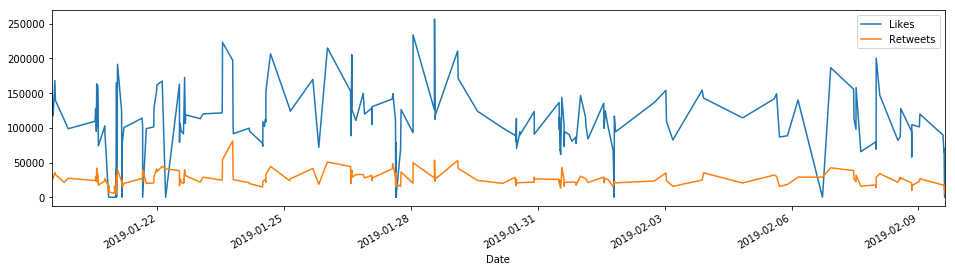

In [154]:
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [155]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for iPhone


In [156]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
Numerous states introducing Bible Literacy classes, giving students the option of studying the Bible. Starting to make a turn back? Great!
Number of likes: 256568
138 characters.

The tweet with more retweets is: 
The citizens of Venezuela have suffered for too long at the hands of the illegitimate Maduro regime. Today, I have… https://t.co/6pcpLqVzaQ
Number of retweets: 81141
139 characters.



## Data Cleaning and Prep For Sentiment Analysis

In [157]:
import nltk
nltk.download('stopwords')
#showing info http://nltk.github.com/nltk_data/

[nltk_data] Downloading package stopwords to C:\Program Files
[nltk_data]     (x86)\Microsoft Visual
[nltk_data]     Studio\Shared\Anaconda3_64\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [158]:
data.head(3)

,Tweets,len,ID,Date,Source,Likes,RTs,word_count,char_count,avg_word
0,"RT @seanhannity: Adam Schiff, Glenn Simpson and their Forrest Gump-like encounter in Aspen https://t.co/j2lqrxflGH",114,1094249047907581952,2019-02-09 14:57:57,Twitter for iPhone,0,7377,14,114,7.214286
1,RT @seanhannity: https://t.co/rhKgdlJt8X,40,1094248839198969857,2019-02-09 14:57:08,Twitter for iPhone,0,5221,3,40,12.666667
2,"RT @seanhannity: TRUMP: “Not only did Senator Burr’s Committee find No Collusion by the Trump Campaign and Russia, it’s important because t…",140,1094247546829058048,2019-02-09 14:51:59,Twitter for iPhone,0,9217,22,140,5.409091


In [159]:
# Number ot stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['stopwords'] = data['Tweets'].apply(lambda x: len([x for x in x.split() if x in stop]))
data[['Tweets','Date','Likes','RTs','char_count','word_count','avg_word','stopwords']].head()

,Tweets,Date,Likes,RTs,char_count,word_count,avg_word,stopwords
0,"RT @seanhannity: Adam Schiff, Glenn Simpson and their Forrest Gump-like encounter in Aspen https://t.co/j2lqrxflGH",2019-02-09 14:57:57,0,7377,114,14,7.214286,3
1,RT @seanhannity: https://t.co/rhKgdlJt8X,2019-02-09 14:57:08,0,5221,40,3,12.666667,0
2,"RT @seanhannity: TRUMP: “Not only did Senator Burr’s Committee find No Collusion by the Trump Campaign and Russia, it’s important because t…",2019-02-09 14:51:59,0,9217,140,22,5.409091,6
3,We have a great economy DESPITE the Obama Administration and all of its job killing Regulations and Roadblocks. If… https://t.co/2rueUOdvof,2019-02-09 14:36:06,70422,17554,139,20,6.000000,8
4,The Democrats in Congress yesterday were vicious and totally showed their cards for everyone to see. When the Repub… https://t.co/jji6able2y,2019-02-09 14:30:36,65402,16574,140,20,6.050000,7


In [160]:
# of HashTags
data['hashtags'] = data['Tweets'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
data[['Tweets','Date','Likes','RTs','char_count','word_count',
      'avg_word','stopwords','hashtags']].head(3)

,Tweets,Date,Likes,RTs,char_count,word_count,avg_word,stopwords,hashtags
0,"RT @seanhannity: Adam Schiff, Glenn Simpson and their Forrest Gump-like encounter in Aspen https://t.co/j2lqrxflGH",2019-02-09 14:57:57,0,7377,114,14,7.214286,3,0
1,RT @seanhannity: https://t.co/rhKgdlJt8X,2019-02-09 14:57:08,0,5221,40,3,12.666667,0,0
2,"RT @seanhannity: TRUMP: “Not only did Senator Burr’s Committee find No Collusion by the Trump Campaign and Russia, it’s important because t…",2019-02-09 14:51:59,0,9217,140,22,5.409091,6,0


In [161]:
# of numerics
data['numerics'] = data['Tweets'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data[['Tweets','Date','Likes','RTs','char_count','word_count',
      'avg_word','stopwords','hashtags','numerics']].head(3)

,Tweets,Date,Likes,RTs,char_count,word_count,avg_word,stopwords,hashtags,numerics
0,"RT @seanhannity: Adam Schiff, Glenn Simpson and their Forrest Gump-like encounter in Aspen https://t.co/j2lqrxflGH",2019-02-09 14:57:57,0,7377,114,14,7.214286,3,0,0
1,RT @seanhannity: https://t.co/rhKgdlJt8X,2019-02-09 14:57:08,0,5221,40,3,12.666667,0,0,0
2,"RT @seanhannity: TRUMP: “Not only did Senator Burr’s Committee find No Collusion by the Trump Campaign and Russia, it’s important because t…",2019-02-09 14:51:59,0,9217,140,22,5.409091,6,0,0


In [162]:
# of uppercase words
data['upper'] = data['Tweets'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
data[['Tweets','Date','Likes','RTs','char_count','word_count',
      'word_count','avg_word','stopwords','hashtags','numerics','upper']].head(3)

,Tweets,Date,Likes,RTs,char_count,word_count,word_count,avg_word,stopwords,hashtags,numerics,upper
0,"RT @seanhannity: Adam Schiff, Glenn Simpson and their Forrest Gump-like encounter in Aspen https://t.co/j2lqrxflGH",2019-02-09 14:57:57,0,7377,114,14,14,7.214286,3,0,0,1
1,RT @seanhannity: https://t.co/rhKgdlJt8X,2019-02-09 14:57:08,0,5221,40,3,3,12.666667,0,0,0,1
2,"RT @seanhannity: TRUMP: “Not only did Senator Burr’s Committee find No Collusion by the Trump Campaign and Russia, it’s important because t…",2019-02-09 14:51:59,0,9217,140,22,22,5.409091,6,0,0,2


In [163]:
#covert to lowercase for preprocessing
data['Tweets'] = data['Tweets'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['Tweets'].head()

0                              rt @seanhannity: adam schiff, glenn simpson and their forrest gump-like encounter in aspen https://t.co/j2lqrxflgh
1                                                                                                        rt @seanhannity: https://t.co/rhkgdljt8x
2    rt @seanhannity: trump: “not only did senator burr’s committee find no collusion by the trump campaign and russia, it’s important because t…
3     we have a great economy despite the obama administration and all of its job killing regulations and roadblocks. if… https://t.co/2rueuodvof
4    the democrats in congress yesterday were vicious and totally showed their cards for everyone to see. when the repub… https://t.co/jji6able2y
Name: Tweets, dtype: object

In [164]:
#Remove Puncutation
data['Tweets'] = data['Tweets'].str.replace('[^\w\s]','')
data['Tweets'].head()

0                                rt seanhannity adam schiff glenn simpson and their forrest gumplike encounter in aspen httpstcoj2lqrxflgh
1                                                                                                        rt seanhannity httpstcorhkgdljt8x
2     rt seanhannity trump not only did senator burrs committee find no collusion by the trump campaign and russia its important because t
3     we have a great economy despite the obama administration and all of its job killing regulations and roadblocks if httpstco2rueuodvof
4    the democrats in congress yesterday were vicious and totally showed their cards for everyone to see when the repub httpstcojji6able2y
Name: Tweets, dtype: object

In [165]:
#removing Stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['Tweets']= data['Tweets'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['Tweets'].head()

0        rt seanhannity adam schiff glenn simpson forrest gumplike encounter aspen httpstcoj2lqrxflgh
1                                                                   rt seanhannity httpstcorhkgdljt8x
2         rt seanhannity trump senator burrs committee find collusion trump campaign russia important
3    great economy despite obama administration job killing regulations roadblocks httpstco2rueuodvof
4     democrats congress yesterday vicious totally showed cards everyone see repub httpstcojji6able2y
Name: Tweets, dtype: object

In [166]:
# Common word removal
freq = pd.Series(' '.join(data['Tweets']).split()).value_counts()[:30]
freq

rt           33
great        28
president    25
people       23
wall         20
border       20
amp          19
today        14
democrats    12
crime        12
security     12
time         11
country      11
new          11
years        10
thank        10
year         10
trump         9
big           8
proposal      8
national      8
news          7
fake          7
one           7
build         7
media         7
far           7
even          7
two           7
working       7
dtype: int64

In [167]:
#removing RT short words
data['Tweets'] = data['Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
data.head(2)

,Tweets,len,ID,Date,Source,Likes,RTs,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper
0,seanhannity adam schiff glenn simpson forrest gumplike encounter aspen httpstcoj2lqrxflgh,114,1094249047907581952,2019-02-09 14:57:57,Twitter for iPhone,0,7377,14,114,7.214286,3,0,0,1
1,seanhannity httpstcorhkgdljt8x,40,1094248839198969857,2019-02-09 14:57:08,Twitter for iPhone,0,5221,3,40,12.666667,0,0,0,1


In [168]:
# Common word removal
freq = pd.Series(' '.join(data['Tweets']).split()).value_counts()[:30]
freq

great              28
president          25
people             23
wall               20
border             20
today              14
security           12
democrats          12
crime              12
time               11
country            11
thank              10
years              10
year               10
trump               9
national            8
proposal            8
meeting             7
working             7
fake                7
realdonaldtrump     7
media               7
build               7
news                7
american            7
even                7
trumps              6
republicans         6
never               6
want                6
dtype: int64

In [169]:
#spelling correction
from textblob import TextBlob
data['Tweets'][:5].apply(lambda x: str(TextBlob(x).correct()))

0          seanhannity adam chief glen simpson forest gumplike encounter aspen httpstcoj2lqrxflgh
1                                                                  seanhannity httpstcorhkgdljt8x
2        seanhannity tramp senator burns committee find collision tramp campaign russia important
3    great economy despite drama administration killing regulations roadblocks httpstco2rueuodvof
4     democrats congress yesterday vicious totally showed cards everyone reply httpstcojji6able2y
Name: Tweets, dtype: object

## Text Mining Analytics

In [170]:
data.head(3)

,Tweets,len,ID,Date,Source,Likes,RTs,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper
0,seanhannity adam schiff glenn simpson forrest gumplike encounter aspen httpstcoj2lqrxflgh,114,1094249047907581952,2019-02-09 14:57:57,Twitter for iPhone,0,7377,14,114,7.214286,3,0,0,1
1,seanhannity httpstcorhkgdljt8x,40,1094248839198969857,2019-02-09 14:57:08,Twitter for iPhone,0,5221,3,40,12.666667,0,0,0,1
2,seanhannity trump senator burrs committee find collusion trump campaign russia important,140,1094247546829058048,2019-02-09 14:51:59,Twitter for iPhone,0,9217,22,140,5.409091,6,0,0,2


In [171]:
text = data['Tweets']
text.head(3)

0    seanhannity adam schiff glenn simpson forrest gumplike encounter aspen httpstcoj2lqrxflgh
1                                                               seanhannity httpstcorhkgdljt8x
2     seanhannity trump senator burrs committee find collusion trump campaign russia important
Name: Tweets, dtype: object

In [172]:
def tweet_cleaner_updated(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()

In [173]:
import numpy as np
import matplotlib.pyplot as plt
import re
from twython import Twython
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image as im

In [174]:
#Create a string form of our list of text
raw_string = ''.join(text)
no_links = re.sub(r'http\S+', '', raw_string)
no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links)
no_special_characters = re.sub('[^A-Za-z ]+', '', no_unicode)

In [175]:
words = no_special_characters.split(" ")
words = [w for w in words if len(w) > 2]  # ignore a, an, be, ...
words = [w.lower() for w in words]
words = [w for w in words if w not in STOPWORDS]

In [176]:
wc = WordCloud(background_color="white", max_words=2000)
clean_string = ','.join(words)
wc.generate(clean_string)

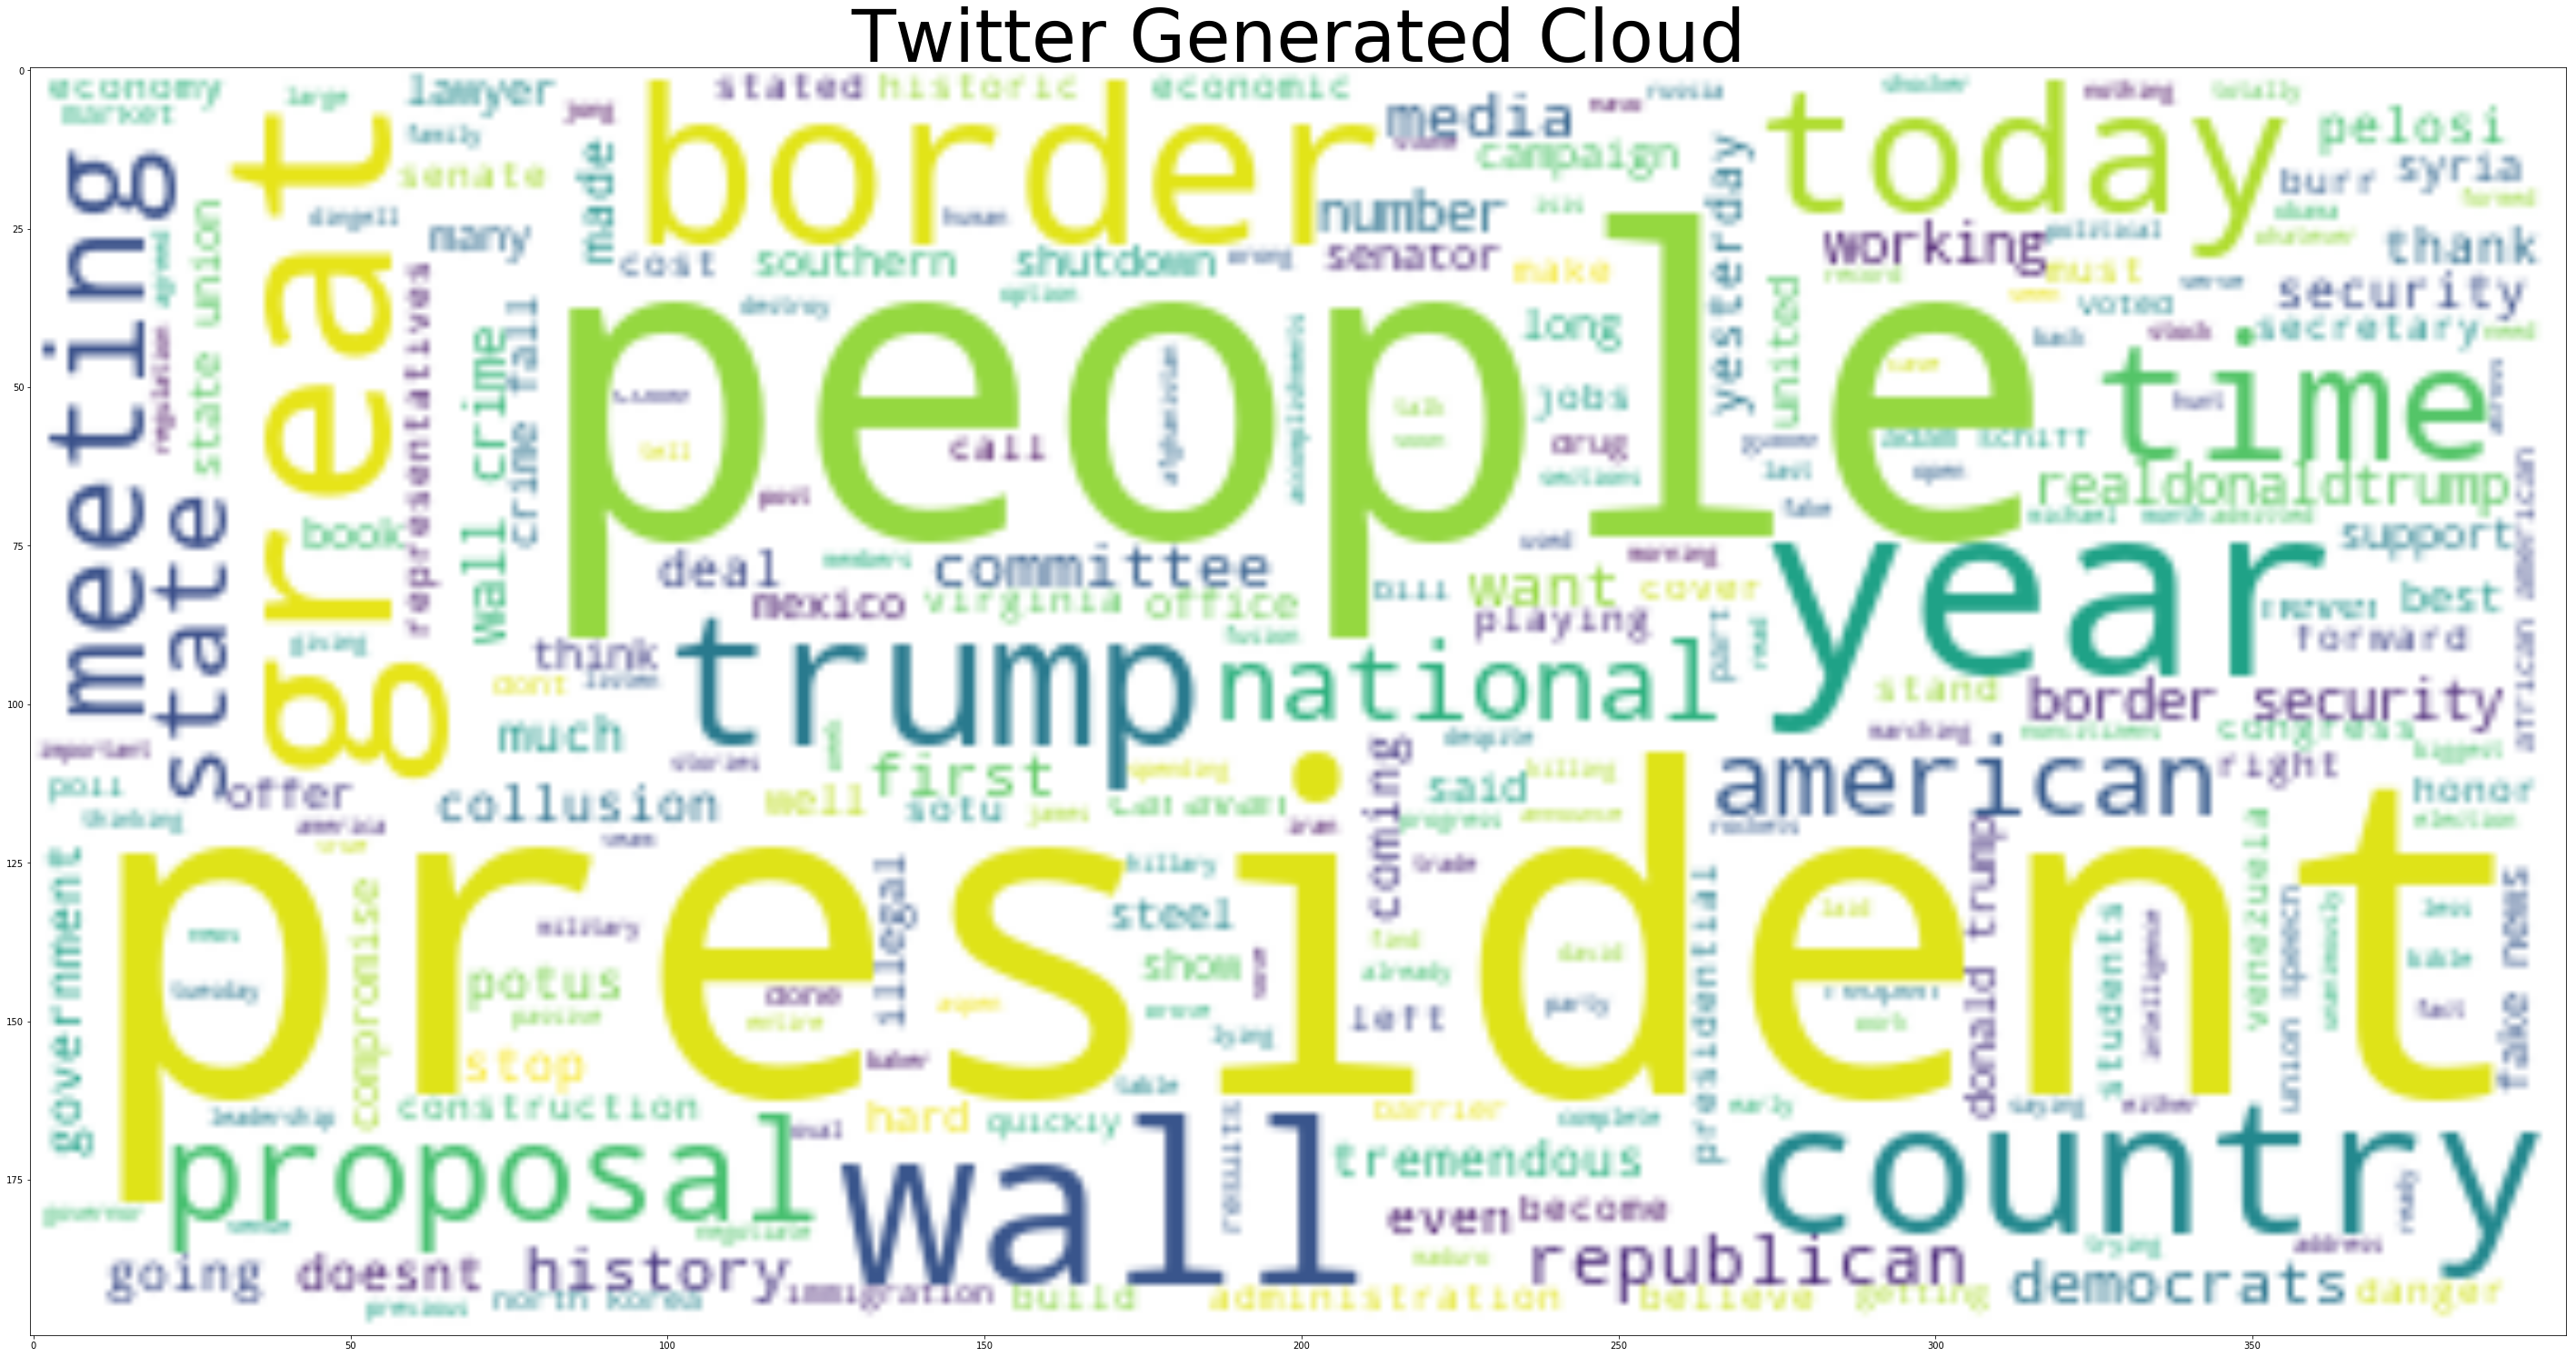

In [177]:
f = plt.figure(figsize=(50,50))
plt.title('Original Stencil', size=40)
plt.imshow(wc, interpolation='bilinear')
plt.title('Twitter Generated Cloud', size=80)
plt.show()

## Sentiment Analysis

In [178]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [179]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(3))

,Tweets,len,ID,Date,Source,Likes,RTs,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper,SA
0,seanhannity adam schiff glenn simpson forrest gumplike encounter aspen httpstcoj2lqrxflgh,114,1094249047907581952,2019-02-09 14:57:57,Twitter for iPhone,0,7377,14,114,7.214286,3,0,0,1,0
1,seanhannity httpstcorhkgdljt8x,40,1094248839198969857,2019-02-09 14:57:08,Twitter for iPhone,0,5221,3,40,12.666667,0,0,0,1,0
2,seanhannity trump senator burrs committee find collusion trump campaign russia important,140,1094247546829058048,2019-02-09 14:51:59,Twitter for iPhone,0,9217,22,140,5.409091,6,0,0,2,1


In [180]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [181]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 44.0%
Percentage of neutral tweets: 40.0%
Percentage de negative tweets: 16.0%


In [197]:
import plotly
plotly.__version__

'3.5.0'

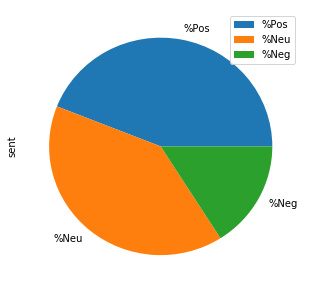

In [199]:
df = pd.DataFrame({'sent': [44, 40 , 16]},index=['%Pos', '%Neu', '%Neg'])
plot = df.plot.pie(y='sent', figsize=(5, 5))

## Tokenization, Stemming and Lemmatization

In [182]:
#Tokenization
TextBlob(data['Tweets'][30]).words

WordList(['tremendous', 'numbers', 'people', 'coming', 'mexico', 'hopes', 'flooding', 'southern', 'border', 'httpstcodzhzfdxfup'])

In [183]:
#Stemming - removal of -ing, -ly, 's

from nltk.stem import PorterStemmer
st = PorterStemmer()
data['Tweets'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    seanhann adam schiff glenn simpson forrest gumplik encount aspen httpstcoj2lqrxflgh
1                                                            seanhann httpstcorhkgdljt8x
2            seanhann trump senat burr committe find collus trump campaign russia import
3           great economi despit obama administr kill regul roadblock httpstco2rueuodvof
4    democrat congress yesterday viciou total show card everyon repub httpstcojji6able2i
Name: Tweets, dtype: object

In [184]:
import nltk
nltk.download('wordnet')
#from nltk.corpus import wordnet
#Lemmatization, convert words into root word
from textblob import Word
data['Tweets'] = data['Tweets'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['Tweets'].head()

[nltk_data] Downloading package wordnet to C:\Program Files
[nltk_data]     (x86)\Microsoft Visual
[nltk_data]     Studio\Shared\Anaconda3_64\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0     seanhannity adam schiff glenn simpson forrest gumplike encounter aspen httpstcoj2lqrxflgh
1                                                                seanhannity httpstcorhkgdljt8x
2       seanhannity trump senator burr committee find collusion trump campaign russia important
3    great economy despite obama administration killing regulation roadblock httpstco2rueuodvof
4     democrat congress yesterday vicious totally showed card everyone repub httpstcojji6able2y
Name: Tweets, dtype: object

In [185]:
#N-Grams - Combo of bigrams N=2 and N=3
TextBlob(data['Tweets'][0]).ngrams(2)

[WordList(['seanhannity', 'adam']),
 WordList(['adam', 'schiff']),
 WordList(['schiff', 'glenn']),
 WordList(['glenn', 'simpson']),
 WordList(['simpson', 'forrest']),
 WordList(['forrest', 'gumplike']),
 WordList(['gumplike', 'encounter']),
 WordList(['encounter', 'aspen']),
 WordList(['aspen', 'httpstcoj2lqrxflgh'])]

In [186]:
#N-Grams - Combo of bigrams N=2 and N=3
TextBlob(data['Tweets'][0]).ngrams(3)

[WordList(['seanhannity', 'adam', 'schiff']),
 WordList(['adam', 'schiff', 'glenn']),
 WordList(['schiff', 'glenn', 'simpson']),
 WordList(['glenn', 'simpson', 'forrest']),
 WordList(['simpson', 'forrest', 'gumplike']),
 WordList(['forrest', 'gumplike', 'encounter']),
 WordList(['gumplike', 'encounter', 'aspen']),
 WordList(['encounter', 'aspen', 'httpstcoj2lqrxflgh'])]

In [187]:
unclean.head(3)

,Tweets,len,ID,Date,Source,Likes,RTs,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper,SA
0,seanhannity adam schiff glenn simpson forrest gumplike encounter aspen httpstcoj2lqrxflgh,114,1094249047907581952,2019-02-09 14:57:57,Twitter for iPhone,0,7377,14,114,7.214286,3,0,0,1,0
1,seanhannity httpstcorhkgdljt8x,40,1094248839198969857,2019-02-09 14:57:08,Twitter for iPhone,0,5221,3,40,12.666667,0,0,0,1,0
2,seanhannity trump senator burr committee find collusion trump campaign russia important,140,1094247546829058048,2019-02-09 14:51:59,Twitter for iPhone,0,9217,22,140,5.409091,6,0,0,2,1


In [193]:
import string 
from nltk.corpus import stopwords 
stopwords = stopwords.words("english")

def _clean(txt):
    txt = txt.lower()
    txt = "".join(x for x in txt if x not in string.punctuation)
    words = txt.split()
    words = [w for w in words if w not in stopwords]
    txt = " ".join(words)
    return txt

unclean["cleaned"] = unclean['Tweets'].apply(lambda x : _clean(x))

unclean[["Tweets", "cleaned"]]

,Tweets,cleaned
0,seanhannity adam schiff glenn simpson forrest gumplike encounter aspen httpstcoj2lqrxflgh,seanhannity adam schiff glenn simpson forrest gumplike encounter aspen httpstcoj2lqrxflgh
1,seanhannity httpstcorhkgdljt8x,seanhannity httpstcorhkgdljt8x
2,seanhannity trump senator burr committee find collusion trump campaign russia important,seanhannity trump senator burr committee find collusion trump campaign russia important
3,great economy despite obama administration killing regulation roadblock httpstco2rueuodvof,great economy despite obama administration killing regulation roadblock httpstco2rueuodvof
4,democrat congress yesterday vicious totally showed card everyone repub httpstcojji6able2y,democrat congress yesterday vicious totally showed card everyone repub httpstcojji6able2y
5,great meeting outstanding young military personnel wounded syria afghanista httpstco0uafzclktf,great meeting outstanding young military personnel wounded syria afghanista httpstco0uafzclktf
6,north korea leadership jong become great economic powerhouse surprise httpstcoxq9hfksc3m,north korea leadership jong become great economic powerhouse surprise httpstcoxq9hfksc3m
7,representative left north korea productive meeting agreed upon time date httpstcogwyyv5misv,representative left north korea productive meeting agreed upon time date httpstcogwyyv5misv
8,frank robinson great player first african american manager httpstconhe4v705gr,frank robinson great player first african american manager httpstconhe4v705gr
9,deepest sympathy congresswoman debbie dingell entire family john dingell longest serving congressm httpstcowbvzkxjcr7,deepest sympathy congresswoman debbie dingell entire family john dingell longest serving congressm httpstcowbvzkxjcr7


In [194]:
## Keyword Analysis 
from collections import Counter
complete_text = " ".join(data["Tweets"])
clean_text = _clean(complete_text)
Counter(clean_text.split()).most_common(10)

[('great', 28),
 ('president', 26),
 ('people', 23),
 ('wall', 22),
 ('border', 21),
 ('year', 20),
 ('trump', 15),
 ('today', 14),
 ('democrat', 13),
 ('time', 12)]

In [195]:
## Top URLs
htags = [w for w in complete_text.split() if w.startswith("http")]
htags = [w for w in htags if "demon" not in w.lower()]
Counter(htags).most_common(10) 

[('httpstcokl6soclx4k', 2),
 ('httpstcoj2lqrxflgh', 1),
 ('httpstcorhkgdljt8x', 1),
 ('httpstco2rueuodvof', 1),
 ('httpstcojji6able2y', 1),
 ('httpstco0uafzclktf', 1),
 ('httpstcoxq9hfksc3m', 1),
 ('httpstcogwyyv5misv', 1),
 ('httpstconhe4v705gr', 1),
 ('httpstcowbvzkxjcr7', 1)]

In [196]:
## Topic Modelling 
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np 

def generate_topic_models(text):
    cvectorizer = CountVectorizer(min_df=4, max_features=2000)
    cvz = cvectorizer.fit_transform(text)

    lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', max_iter=20, random_state=42)
    X_topics = lda_model.fit_transform(cvz)

    topic_word = lda_model.components_ 
    vocab = cvectorizer.get_feature_names()
    return topic_word, vocab 

n_top_words = 10
topic_word, vocab = generate_topic_models(unclean["cleaned"].values)
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print ("Topic " + str(i+1) + ": " + " | ".join(topic_words) + "\n")

Topic 1: realdonaldtrump | done | stop | last | coming | proposal | president | want | mexico | historic

Topic 2: democrat | proposal | nancy | pelosi | support | even | security | yesterday | border | state

Topic 3: lawyer | campaign | trump | committee | collusion | fake | senator | potus | compromise | deal

Topic 4: year | wall | want | crime | best | dont | many | realdonaldtrump | great | stop

Topic 5: border | number | country | caravan | much | mexico | large | tremendous | coming | southern

Topic 6: great | today | thank | working | people | state | economy | well | hard | country

Topic 7: time | news | year | president | fake | donald | trump | medium | first | korea

Topic 8: wall | fall | crime | build | looking | going | think | trump | year | president

Topic 9: forward | never | sotu | republican | president | reopen | trump | united | offer | security

Topic 10: president | people | border | american | government | security | national | today | trump | proposal



## Appendix Referencess

- https://www.nltk.org/book/
- Natural Language Processing with Python: Analyzing Text with the Natural Language Toolkit - Steven Bird 
- https://github.com/iwatobipen/mishimasyk/blob/master/df2json_sample.ipynb
- https://dzone.com/articles/nlp-tutorial-using-python-nltk-simple-examples
- https://www.analyticsvidhya.com/blog/2018/07/hands-on-sentiment-analysis-dataset-python/